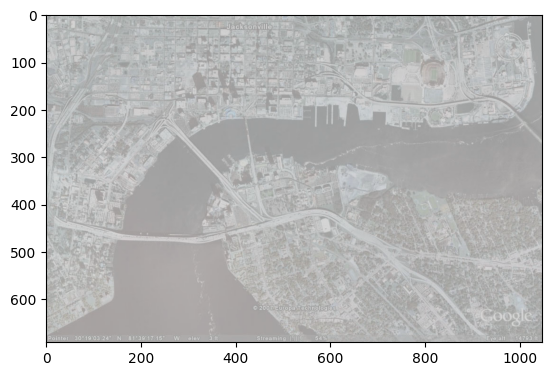

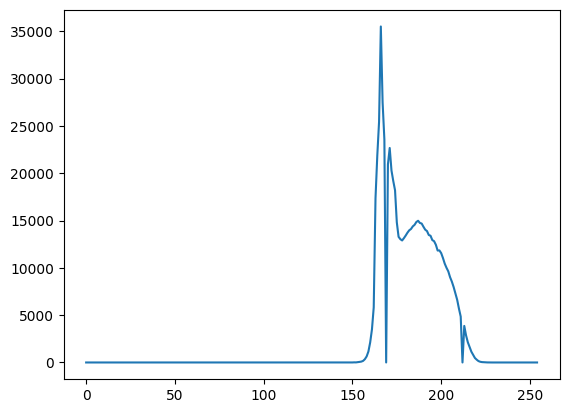

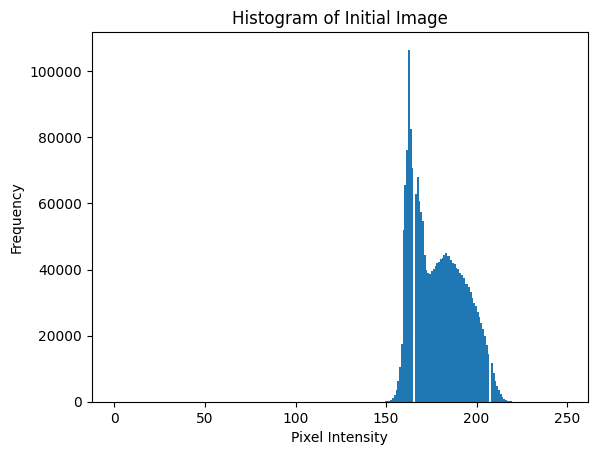

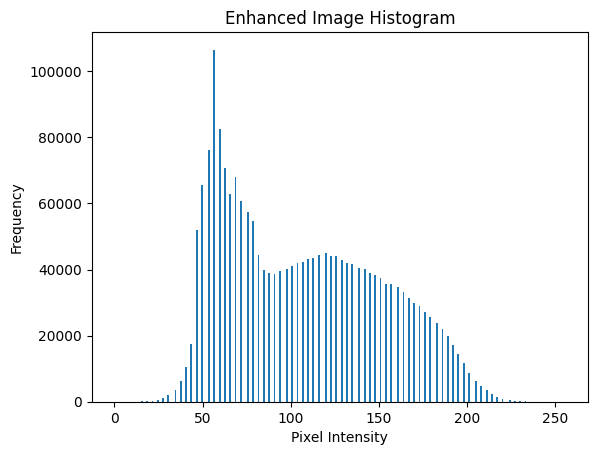

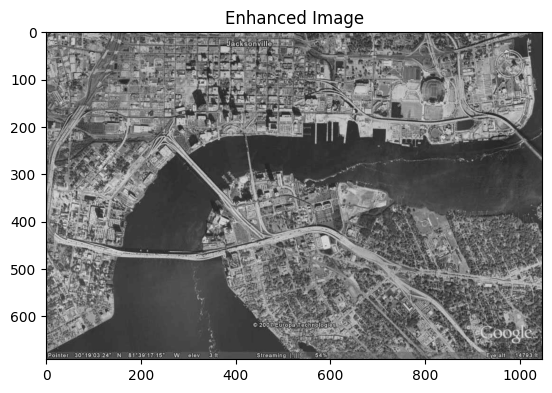

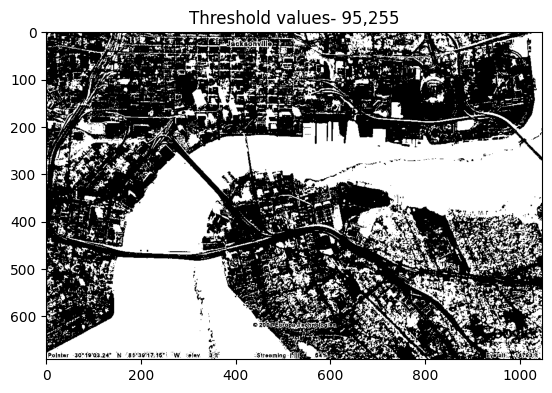

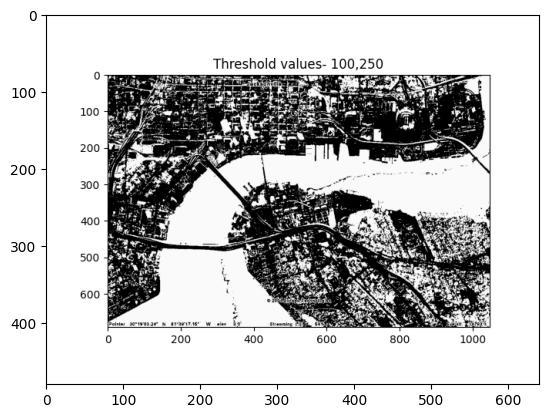

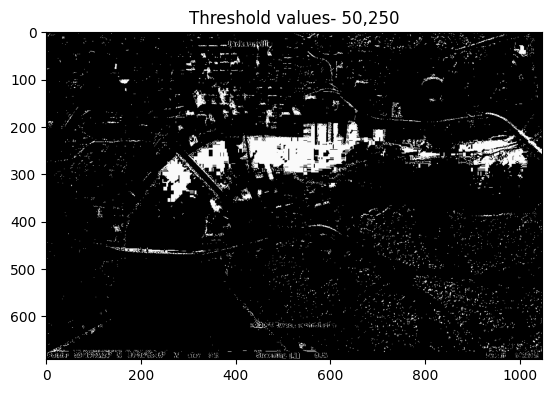

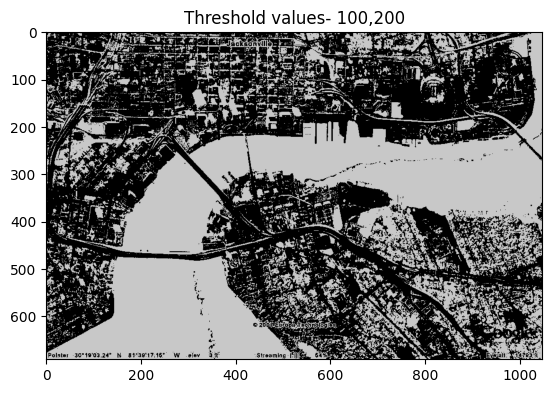

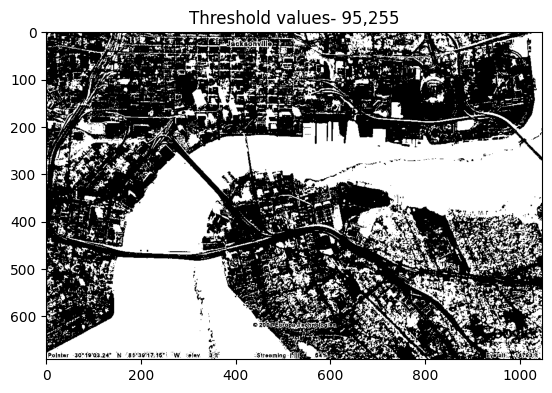

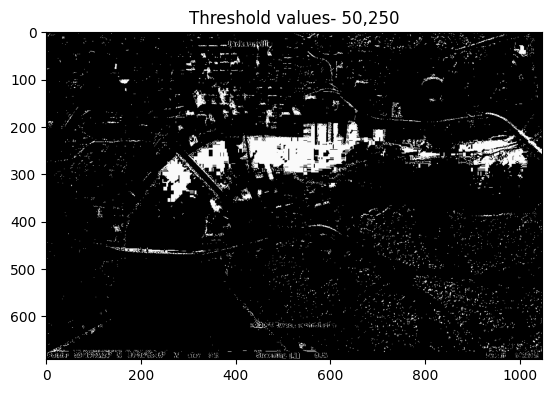

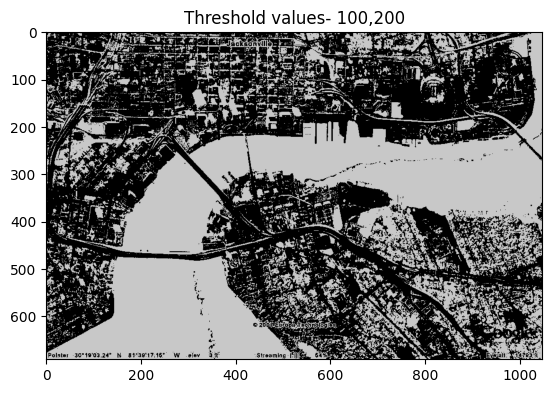

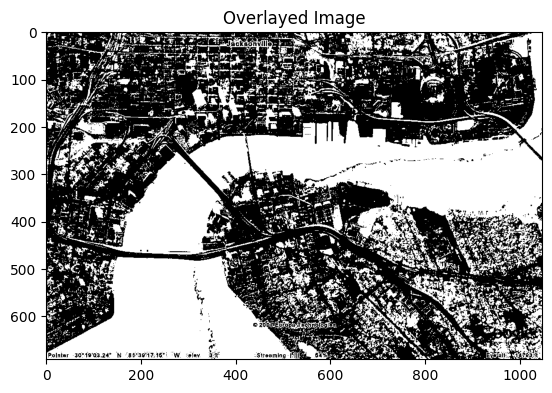

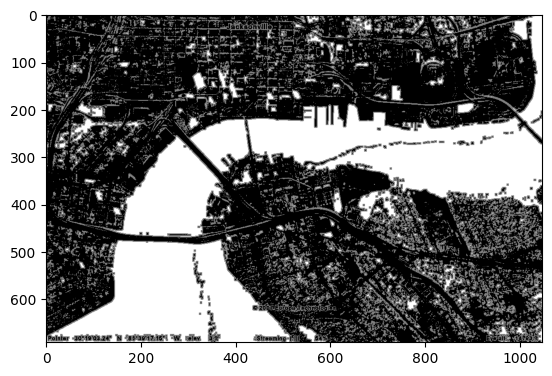

In [44]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

def main():
    #read image and show
    img = cv2.imread("input_sat_image.jpg")
    plt.imshow(img)
    plt.show()
    
    img_shape = img.shape
    
    img = cv2.imread("input_sat_image.jpg", cv2.IMREAD_GRAYSCALE)
    img_shape = img.shape
    
    histogram = cv2.calcHist([img],[0],None,[255],[0,249])
    plt.plot(histogram)
    plt.show()
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.hist(img.ravel(), bins=255, range=(0, 249))
    plt.title('Histogram of Initial Image')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

    # Calculate minimum and maximum pixel values
    min_val = np.min(img)
    max_val = np.max(img)

    #vectorized operations
    contrast_stretching= np.zeros_like(img)
    # Perform contrast stretching
    contrast_stretching = 255*((img - min_val)/ (max_val - min_val))

    # Round the pixel values to the nearest integer
    contrast_stretching = np.round(contrast_stretching)

    #pixel values to the range [0, 255]
    contrast_stretching = np.clip(contrast_stretching, 0, 255)
    contrast_stretching = contrast_stretching.astype('uint8')

    plt.figure()
    plt.hist(contrast_stretching.ravel(), bins=255, range=(0, 256))
    plt.title('Enhanced Image Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()
    
    plt.figure()
    plt.imshow(contrast_stretching, cmap='gray')
    plt.title("Enhanced Image")
    plt.savefig("enhanced_image.png")
    plt.show()

    
    # Read and apply contrast stretching to the image
    contract_streching = cv2.imread("enhanced.jpg")
    
    # Apply adaptive thresholding to obtain binary image with threshold values- 95, 255
    threshold_value = 95
    max_value = 255
    threshold_type = cv2.THRESH_BINARY_INV
    binary_image = cv2.threshold(contract_streching, threshold_value, max_value, threshold_type)[1]
    
    # Show and save binary image
    plt.imshow(binary_image)
    plt.title('Threshold values- 95,255')
    plt.savefig("Binary_Image_95,255.png")
    plt.show()
    cv2.imwrite("Binary_Image.png", binary_image)
    
    
    # Read and show binary image with threshold values- 100, 250
    binary_image = cv2.imread("Binary_Image_100,250.png")
    plt.imshow(binary_image)
    plt.show()
    
    # Apply adaptive thresholding to obtain binary image with threshold values- 50, 250
    threshold_value = 50
    max_value = 250
    threshold_type = cv2.THRESH_BINARY_INV
    binary_image = cv2.threshold(contract_streching, threshold_value, max_value, threshold_type)[1]
    
    # Show and save binary image
    plt.imshow(binary_image)
    plt.title('Threshold values- 50,250')
    plt.savefig("Binary_Image_50,250.png")
    plt.show()
    
    # Apply adaptive thresholding to obtain binary image with threshold values- 100, 200
    threshold_value = 100
    max_value = 200
    threshold_type = cv2.THRESH_BINARY_INV
    binary_image = cv2.threshold(contract_streching, threshold_value, max_value, threshold_type)[1]
    
    # Show and save binary image
    plt.imshow(binary_image)
    plt.title('Threshold values- 100,200')
    plt.savefig("Binary_Image_100,200.png")
    plt.show()


    
    # Read and process enhanced image
    contract_streching = cv2.imread("enhanced.jpg")
    threshold_value = 95
    max_value = 255
    threshold_type = cv2.THRESH_BINARY_INV
    binary_image = cv2.threshold(contract_streching, threshold_value, max_value, threshold_type)[1]
    cv2.imwrite("Binary_Image.png", binary_image)
    
    # Show binary image and explore different threshold values
    plt.imshow(binary_image)
    plt.title('Threshold values- 95,255')
    plt.savefig("Binary_Image_95,255.png")
    plt.show()

    threshold_value = 50
    max_value = 250
    threshold_type = cv2.THRESH_BINARY_INV
    binary_image = cv2.threshold(contract_streching, threshold_value, max_value, threshold_type)[1]
    plt.imshow(binary_image)
    plt.title('Threshold values- 50,250')
    plt.savefig("Binary_Image_50,250.png")
    plt.show()
    
    threshold_value = 100
    max_value = 200
    threshold_type = cv2.THRESH_BINARY_INV
    binary_image = cv2.threshold(contract_streching, threshold_value, max_value, threshold_type)[1]
    plt.imshow(binary_image)
    plt.title('Threshold values- 100,200')
    plt.savefig("Binary_Image_100,200.png")
    plt.show()
    
    # Apply morphological operations
    img = cv2.imread("Binary_Image.png",cv2.IMREAD_GRAYSCALE)
    kernel_size_3 = 3
    kernel_size_5 = 5

    kernel_3 = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size_3, kernel_size_3))
    kernel_5 = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size_5, kernel_size_5))

    eroded_img_3 = cv2.erode(img, kernel_3, iterations=1)
    dilated_img_3 = cv2.dilate(img, kernel_3, iterations=1)

    eroded_img_5 = cv2.erode(img, kernel_5, iterations=1)
    dilated_img_5 = cv2.dilate(img, kernel_5, iterations=1)

    opened_img_3 = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel_3)
    closed_img_3 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel_3)

    opened_img_5 = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel_5)
    closed_img_5 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel_5)

    cv2.imwrite("Filtered_Image.png",eroded_img_5)

    Overlay_enhanced_image = cv2.add(img, eroded_img_5)
    plt.figure()
    plt.title("Overlayed Image")
    plt.imshow(Overlay_enhanced_image,cmap="gray")
    cv2.imwrite("Overlayed_Enhanced_Image.png", Overlay_enhanced_image)
    plt.show()

    blended = cv2.addWeighted(img, 0.5, eroded_img_5, 0.5, 0)
    plt.figure()
    plt.imshow(blended,cmap="gray")
    plt.show()

if __name__ == '__main__':
        main()



